## Accuracy chart

In [24]:
import os
import pandas as pd

# Get the absolute path to the Excel file
excel_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'output', 'similarity_range_analysis.xlsx')

# read the Excel file into a dataframe
df = pd.read_excel(excel_path)

# output the head of the dataframe
print(df.head())

                                               query  \
0  Provision of Event Management Services   [Cat ...   
1  PROVISION OF GDC RESOURCES    EXTRANET BANDWID...   
2  WOG Translation and Related Services Period Co...   
3  WOG Research Services Period Contract cum Fram...   
4  WOG Research Services Period Contract cum Fram...   

                         expected_description  top_similarity_score  \
0                    Other Services(OOE only)                 30.01   
1  Tech Services-Network and Cabling Services                 30.14   
2                    Other Services(OOE only)                 30.17   
3                    Other Services(OOE only)                 30.21   
4                    Other Services(OOE only)                 30.21   

   is_correct                                      top_5_matches  \
0        True  Other Services-Property Management Services; T...   
1        True  Utilities-Telecommunications; Other Services-L...   
2        True  Staff Well-Being(

In [25]:
import re

# convert all queries to lowercase and remove non-alphanumeric characters
def keep_alphanumeric(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=['object']).columns
    for column in columns:
        df[column] = df[column].str.lower().apply(lambda x: re.sub(r'\W+', ' ', x))
    return df

df_filtered = keep_alphanumeric(df, columns=['query'])

# create a new column 'word_query' with the first word from the 'query' column
df_filtered['word_query'] = df_filtered['query'].apply(lambda x: x.split()[0] if x.split() else '')

# print the first 5 rows to verify the changes
print(df_filtered.head())

                                               query  \
0  provision of event management services cat 2 h...   
1  provision of gdc resources extranet bandwidth ...   
2  wog translation and related services period co...   
3  wog research services period contract cum fram...   
4  wog research services period contract cum fram...   

                         expected_description  top_similarity_score  \
0                    Other Services(OOE only)                 30.01   
1  Tech Services-Network and Cabling Services                 30.14   
2                    Other Services(OOE only)                 30.17   
3                    Other Services(OOE only)                 30.21   
4                    Other Services(OOE only)                 30.21   

   is_correct                                      top_5_matches  \
0        True  Other Services-Property Management Services; T...   
1        True  Utilities-Telecommunications; Other Services-L...   
2        True  Staff Well-Being(

In [26]:
# Get the count of each word in 'word_query' where 'is_correct' is False
word_counts = df_filtered[df_filtered['is_correct'] == False]['word_query'].value_counts().reset_index()

# Rename the columns for better readability
word_counts.columns = ['word', 'count']

# Sort the dataframe by count in descending order
word_counts = word_counts.sort_values(by='count', ascending=False)

# Output the full dataframe
print(word_counts.head(10))

        word  count
0  provision   3931
1        wog    344
2     supply    277
3       five     81
4      three     64
5      whole     53
6  framework     37
7     period     22
8          7     22
9      video     22


In [27]:
# Check if 'is_correct' column exists in the dataframe
if 'is_correct' in df_filtered.columns:
    # Get the top 10 words with the most counts of false matches
    top_10_false_words = word_counts.head(10)

    # Initialize lists to store the counts of true matches and accuracy percentages
    true_counts = []
    accuracy_percentages = []

    # Calculate the count of true matches and accuracy percentage for each word
    for word in top_10_false_words['word']:
        true_count = df_filtered[(df_filtered['word_query'] == word) & (df_filtered['is_correct'] == True)].shape[0]
        false_count = df_filtered[(df_filtered['word_query'] == word) & (df_filtered['is_correct'] == False)].shape[0]
        total_count = true_count + false_count
        accuracy_percentage = (true_count / total_count) * 100 if total_count > 0 else 0
        true_counts.append(true_count)
        accuracy_percentages.append(accuracy_percentage)

    # Add the true counts and accuracy percentages to the dataframe
    top_10_false_words['true_count'] = true_counts
    top_10_false_words['accuracy_percentage'] = accuracy_percentages

    # Output the new dataframe
    print(top_10_false_words)
else:
    print("The 'is_correct' column does not exist in the dataframe.")

        word  count  true_count  accuracy_percentage
0  provision   3931         935            19.214961
1        wog    344         303            46.831530
2     supply    277          70            20.172911
3       five     81          15            15.625000
4      three     64           9            12.328767
5      whole     53           0             0.000000
6  framework     37          14            27.450980
7     period     22           5            18.518519
8          7     22           0             0.000000
9      video     22           0             0.000000


C:\Users\Arkhaya\AppData\Local\Temp\ipykernel_25928\2024847231.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_false_words['true_count'] = true_counts
C:\Users\Arkhaya\AppData\Local\Temp\ipykernel_25928\2024847231.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_false_words['accuracy_percentage'] = accuracy_percentages


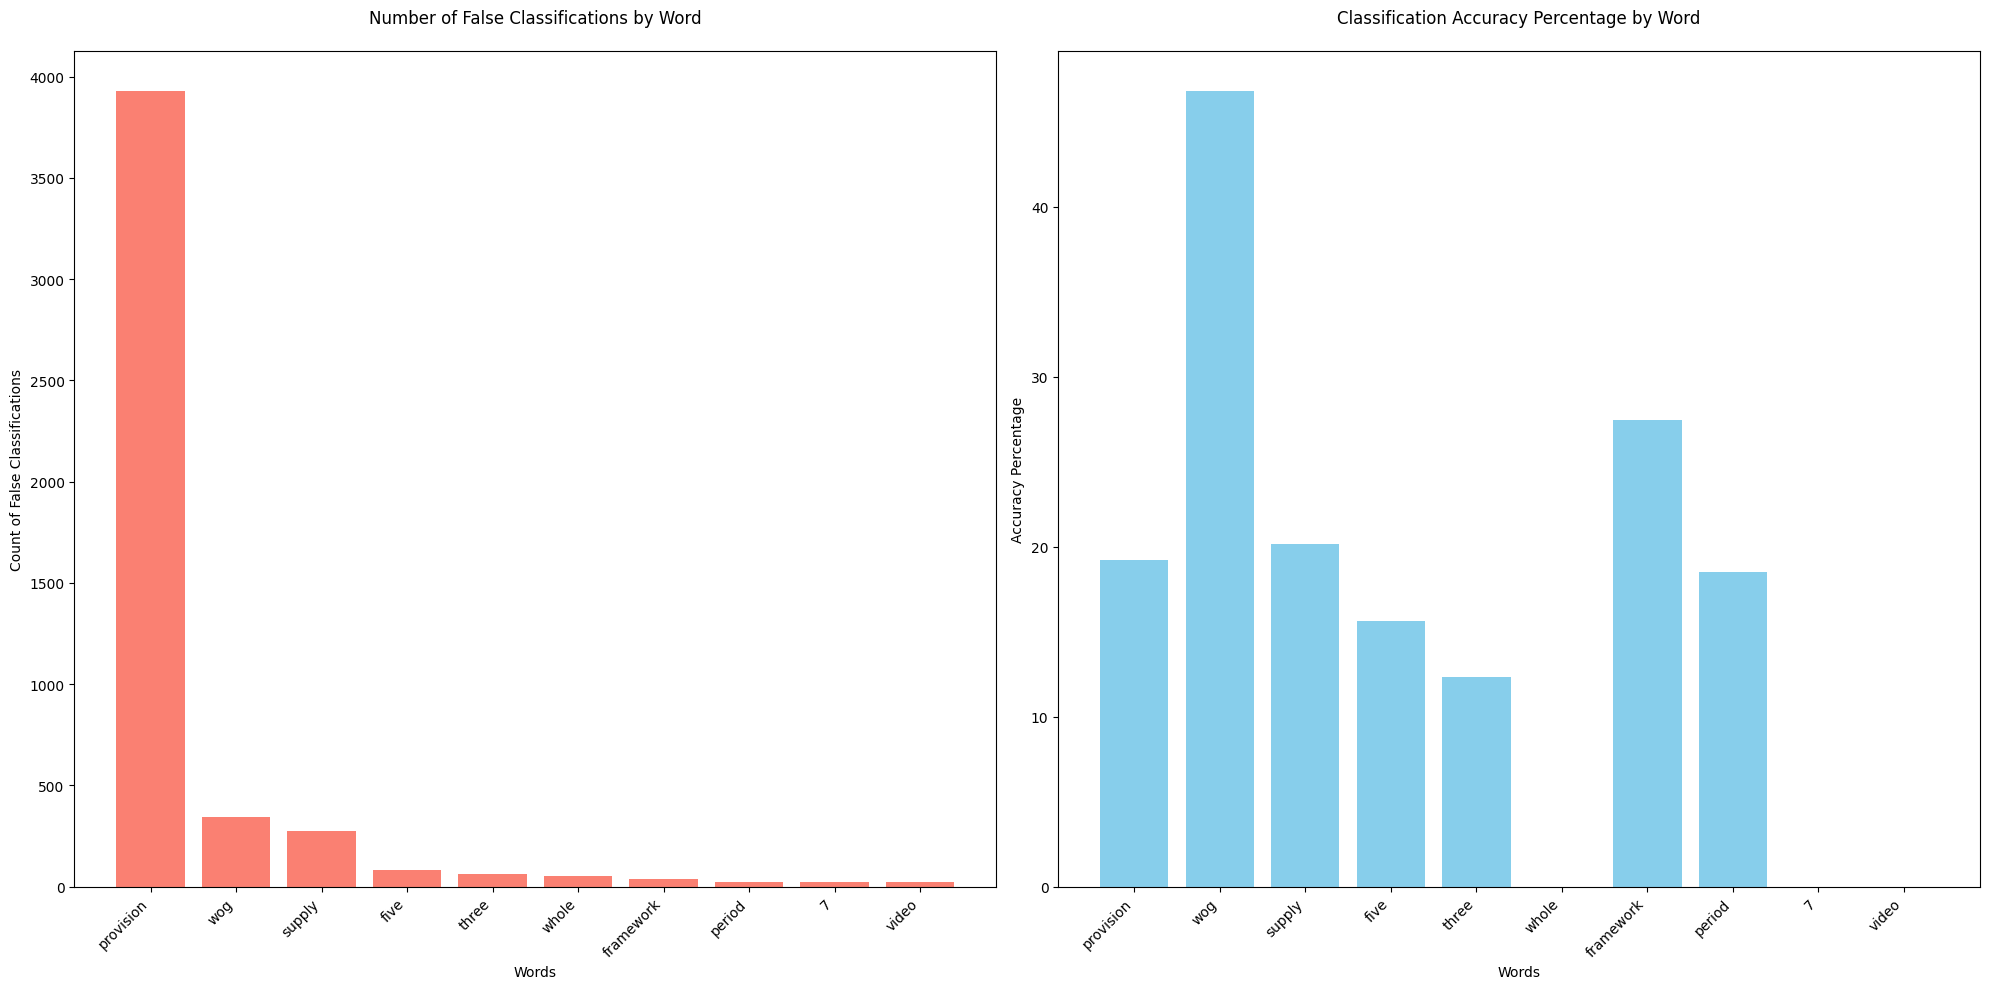

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 10))

# Plot 1: Bar chart of false counts
plt.subplot(1, 2, 1)
plt.bar(top_10_false_words['word'], top_10_false_words['count'], color='salmon')
plt.title('Number of False Classifications by Word', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Count of False Classifications')

# Plot 2: Accuracy percentages
plt.subplot(1, 2, 2)
plt.bar(top_10_false_words['word'], top_10_false_words['accuracy_percentage'], color='skyblue')
plt.title('Classification Accuracy Percentage by Word', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Accuracy Percentage')

plt.tight_layout()
plt.show()

C:\Users\Arkhaya\AppData\Local\Temp\ipykernel_25928\1072845645.py:38: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


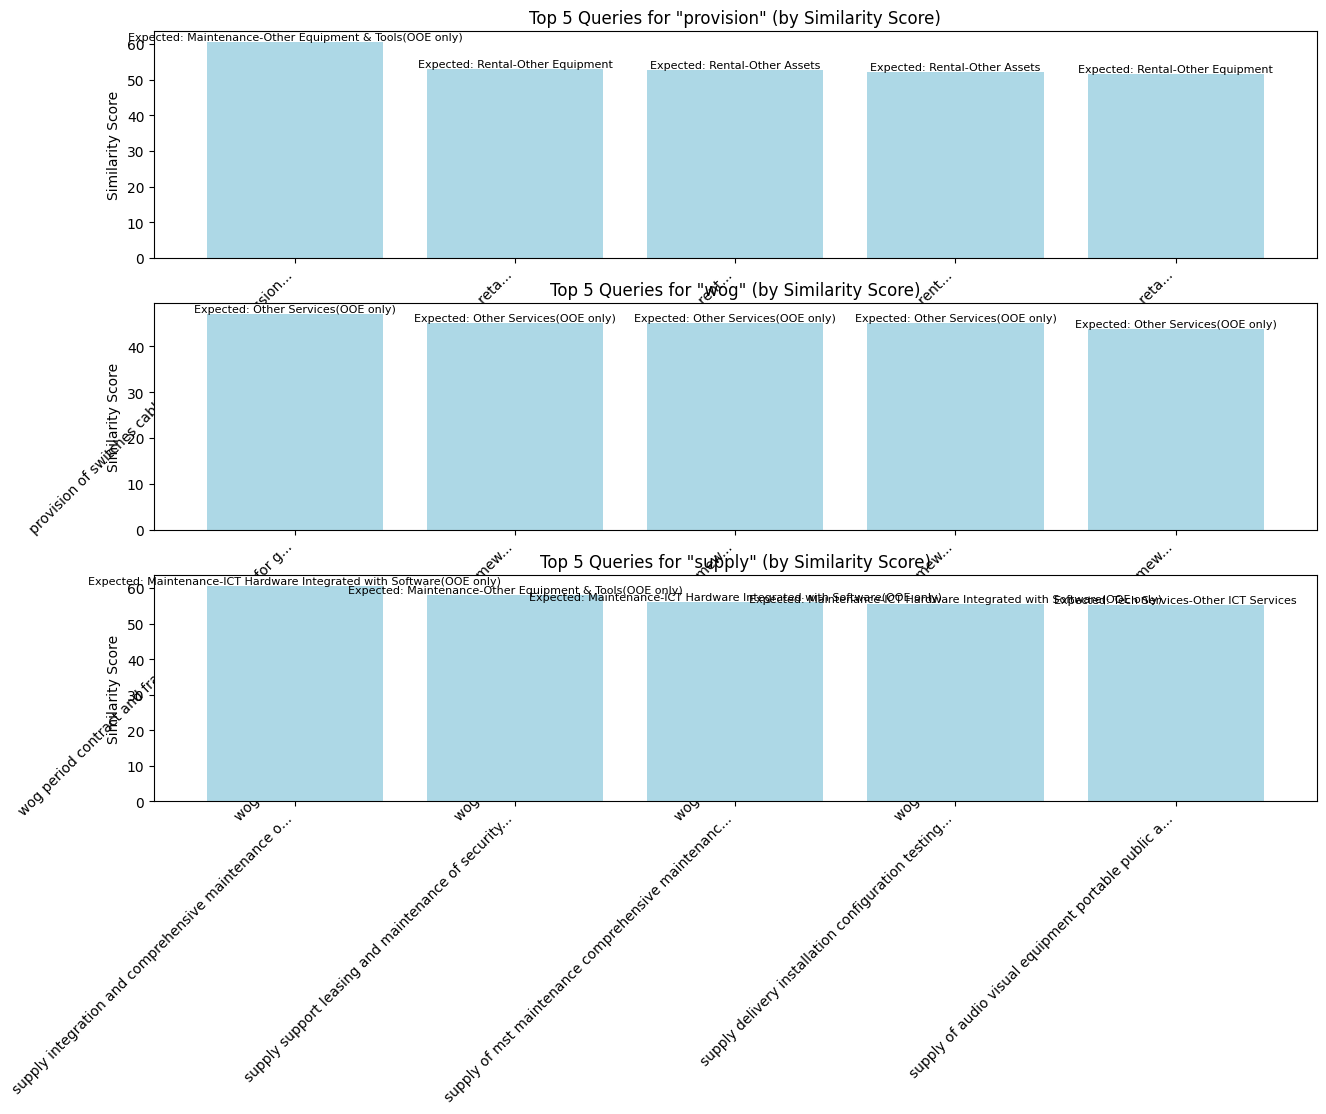


Detailed Analysis for 'provision':

Top 5 Queries:
                                                                                                                                                                                                                                                                                        Query                             Expected Category  Similarity Score
provision of switches cabling works and professional services for enhancement of it infrastructure at multiple sites for singapore prison service under bulk tender ida t 1445 g lot 6 cabling works and professional services for refurbishment of site 6 to provide more workspace to users Maintenance-Other Equipment & Tools(OOE only)             60.51
                                                                                                                                      provision of logistics services for home team retail megamart htrm ops log supply removable sticker for glass pane

In [29]:
# Get the top 3 words with the most counts of false matches
top_3_words = top_10_false_words.head(3)['word']

# Initialize dictionaries to store the dataframes
occurrences = {}

# Iterate over the top 3 words
for word in top_3_words:
    # Filter the dataframe for the current word where is_correct is False
    word_df_false = df_filtered[(df_filtered['word_query'] == word) & (df_filtered['is_correct'] == False)]
    
    # Sort by top_similarity_score to get the most occurrences
    occurrences[word] = word_df_false.sort_values(by='top_similarity_score', ascending=False).head(5)

# Create a figure for the query analysis
plt.figure(figsize=(15, 10))

# Plot similarity scores for each word's top queries
for idx, (word, df) in enumerate(occurrences.items()):
    plt.subplot(3, 1, idx + 1)
    
    # Create bar chart for similarity scores
    scores = df['top_similarity_score']
    plt.bar(range(len(scores)), scores, color='lightblue')
    
    # Add query text as labels
    queries = df['query'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)
    plt.xticks(range(len(queries)), queries, rotation=45, ha='right')
    
    plt.title(f'Top 5 Queries for "{word}" (by Similarity Score)')
    plt.ylabel('Similarity Score')
    
    # Add expected descriptions as text annotations
    for i, (score, desc) in enumerate(zip(scores, df['expected_description'])):
        plt.text(i, score, f'\nExpected: {desc}', ha='center', va='bottom', rotation=0,
                fontsize=8, wrap=True)

plt.tight_layout()
plt.show()

# Display detailed information in tables
for word, df in occurrences.items():
    print(f"\nDetailed Analysis for '{word}':\n")
    print("Top 5 Queries:")
    analysis_df = df[['query', 'expected_description', 'top_similarity_score']].copy()
    analysis_df.columns = ['Query', 'Expected Category', 'Similarity Score']
    print(analysis_df.to_string(index=False))
    print("\n" + "-"*100)

## Analysis of Classification Discrepancies

The analysis reveals significant issues with classification accuracy, primarily stemming from discrepancies between the model's natural language understanding and the expected categorical outputs. Here's a detailed breakdown of the observations:

### Key Findings

1. **Logical Mismatch**
   - The model's suggested matches often make logical sense from an NLP perspective
   - However, these logically sound matches frequently differ from the expected output categories
   - Example: Queries containing "manpower" are expected to be classified as "other" despite clear semantic relationships to manpower-related categories

2. **Pattern Recognition Issues**
   - Natural language matching appears insufficient for this specific dataset
   - The expected classifications often follow business logic rather than semantic relationships
   - This creates a fundamental disconnect between the model's understanding and the desired output

### Recommendations

1. **System Restructuring and Data Cleaning**
   - Engage with stakeholders to discuss potential system modifications
   - Focus on creating cleaner, more consistent training data
   - Consider implementing reinforcement learning to better capture classification patterns
   - Benefits:
     - Reduced need for model retraining
     - Better pattern recognition
     - More consistent classifications
   - Cons:
     - May be hard for stakeholders to change
     - May distrupt the current system used

2. **Supervised Learning Approach**
   - Implement supervised learning to force pattern recognition
   - Advantages:
     - Minimal system changes required
     - Can maintain existing infrastructure
   - Challenges:
     - Risk of overfitting due to inconsistent patterns
     - Requires retraining
     - May not address fundamental logic mismatches

3. **Random Forest Implementation**
   - Consider using random forest classifiers
   - Benefits:
     - Better suited for multiple pattern recognition
     - Can handle general and specific cases simultaneously
     - No need for dataset restructuring
     - More robust to pattern variations
   - Features:
     - Multiple decision trees learning different patterns
     - Ensemble approach for better generalization
     - Reduced risk of overfitting

The choice of approach should be based on stakeholder requirements, system constraints, and the feasibility of implementing changes to the existing infrastructure. Can use k-fold to be able to see what are the variatons for the models or data variations that can be used

